In [81]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [85]:
# Load the image and preprocess
image_path = 'download.jpg'  
original_image = cv2.imread(image_path)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
original_image = cv2.resize(original_image, (128, 128))  


In [117]:
# Normalize image
original_image = original_image.astype('float32') / 255.0

In [95]:
# Add Gaussian noise to the image
def add_gaussian_noise(image, mean=0, sigma=0.05):
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 1)
    return noisy_image

In [97]:
# Create noisy image
noisy_image = add_gaussian_noise(original_image)

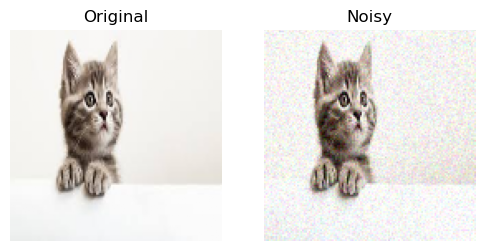

In [99]:
# Display original and noisy image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(original_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Noisy")
plt.imshow(noisy_image)
plt.axis('off')
plt.show()

In [101]:
# Prepare data for the autoencoder
noisy_image = np.expand_dims(noisy_image, axis=0)
original_image = np.expand_dims(original_image, axis=0)

In [103]:
# Build the autoencoder model
input_img = Input(shape=(128, 128, 3))

In [105]:
# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

In [107]:
# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)


In [109]:
# Create model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [111]:
# Train the model
autoencoder.fit(noisy_image, original_image, epochs=500, verbose=1)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6791
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6145
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.5390
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4510
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.3749
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.3524
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.3866
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4073
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3937
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3648
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3425
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.3401
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.3519
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.3606
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.3586
Epoch 16/500
1/1 ━━━

In [112]:
# Denoise the noisy image
denoised_image = autoencoder.predict(noisy_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


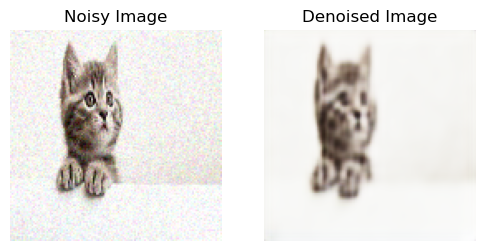

In [113]:
# Display denoised image
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plt.title("Noisy Image")
plt.imshow(np.squeeze(noisy_image))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(np.squeeze(denoised_image))
plt.axis('off')

plt.show()